# Solar Flare Regression

[Dataset](http://archive.ics.uci.edu/ml/datasets/Solar+Flare) for the project was taken from the great UCI Repository.

![Dataset info from the site](images/cover.png)

## Objective

_Wanna create a model which could fit the data about how many solar flares and what classes of them the sun was produced during the last 24 hours. And make some predictictions on the validation set._

![That's how we see the solar flare](images/just_sun.jpg)

![That's how it's really looks like](images/flares.png)

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings

In [2]:
# plot configuration
plt.rcParams["figure.figsize"] = 15, 5

# Let's have a closer look at our Dataset


## Attribute Information

<pre>
1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
2. Code for largest spot size              (X,R,S,A,H,K)
3. Code for spot distribution              (X,O,I,C)
4. Activity                                (1 = reduced, 2 = unchanged)
5. Evolution                               (1 = decay, 2 = no growth, 
                                           3 = growth)
6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,
                                           2 = one M1,
                                           3 = more activity than one M1)
7. Historically-complex                    (1 = Yes, 2 = No)
8. Did region become historically complex  (1 = yes, 2 = no) 
  on this pass across the sun's disk
9. Area                                    (1 = small, 2 = large)
10. Area of the largest spot                (1 = <=5, 2 = >5)

From all these predictors three classes of flares are predicted, which are 
represented in the last three columns.

11. C-class flares production by this region    Number  
  in the following 24 hours (common flares)
12. M-class flares production by this region    Number
  in the following 24 hours (moderate flares)
13. X-class flares production by this region    Number
  in the following 24 hours (severe flares)
</pre>

Missing values: None

![Demystification of codes (via http://www.petermeadows.com/html/glossary.html)](images/solar_glossary.png)

## Loading Dataset

In [3]:
# Load dataset #1
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1"
names = ['Class code',
         'Largest spot size code',
         'Spot distribution code',
         'Activity',
         'Evolution',
         'Flare activity',
         'Historically-complex',
         'Historically-complex region',
         'Area',
         'Largest spot area',
         'C-class flares production',
         'M-class flares production',
         'X-class flares production']
dataset1 = pandas.read_csv(url, names=names, sep='\s+', skiprows=[0])

In [4]:
# Load dataset #2
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2"
names = ['Class code',
         'Largest spot size code',
         'Spot distribution code', 
         'Activity',
         'Evolution',
         'Flare activity',
         'Historically-complex',
         'Historically-complex region',
         'Area',
         'Largest spot area',
         'C-class flares production',
         'M-class flares production',
         'X-class flares production']
dataset2 = pandas.read_csv(url, names=names, sep='\s+', skiprows=[0])

In [5]:
dataset = pandas.concat([dataset1, dataset2])

In [6]:
# head
dataset.head(5)

,Class code,Largest spot size code,Spot distribution code,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


## Data Visualization

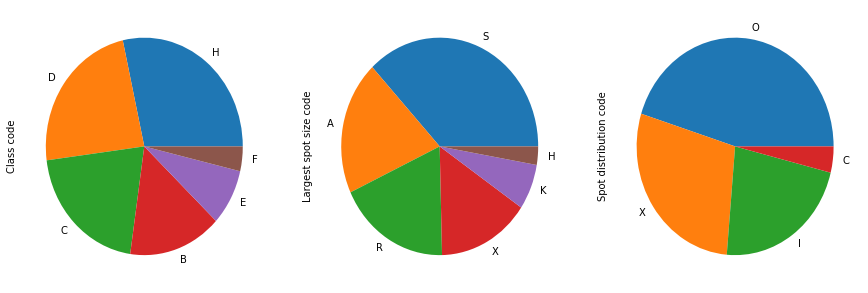

In [7]:
fig = plt.figure()

fig.add_subplot(131)
dataset['Class code'].value_counts().plot.pie()

fig.add_subplot(132)
dataset['Largest spot size code'].value_counts().plot.pie()

fig.add_subplot(133)
dataset['Spot distribution code'].value_counts().plot.pie()

plt.show()

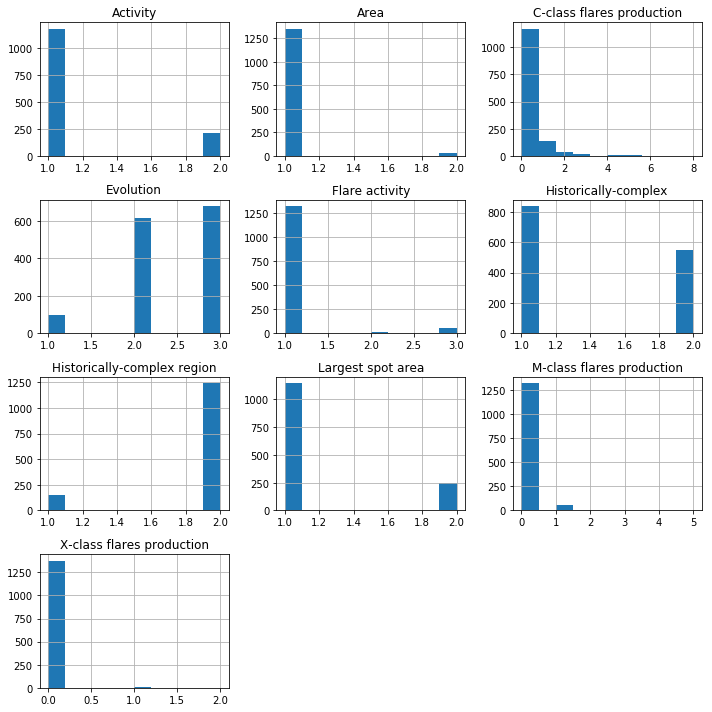

In [9]:
# histograms
plt.rcParams["figure.figsize"] = 10, 10
dataset.hist()
plt.tight_layout()

# Data Preprocessing

## Converting Categorical

In [10]:
dataset.dtypes

Class code                     object
Largest spot size code         object
Spot distribution code         object
Activity                        int64
Evolution                       int64
Flare activity                  int64
Historically-complex            int64
Historically-complex region     int64
Area                            int64
Largest spot area               int64
C-class flares production       int64
M-class flares production       int64
X-class flares production       int64
dtype: object

### One hot encoding method
Getting rid of Class, Largest spot size and Spot distribution codes.

In [11]:
dataset = pandas.get_dummies(dataset)
dataset.head()

,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production,...,Largest spot size code_A,Largest spot size code_H,Largest spot size code_K,Largest spot size code_R,Largest spot size code_S,Largest spot size code_X,Spot distribution code_C,Spot distribution code_I,Spot distribution code_O,Spot distribution code_X
0,1,2,1,1,2,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,3,1,1,2,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,3,1,1,2,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,3,1,1,2,1,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Manually

In [12]:
# codes = {"Class code":             {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7},
#          "Largest spot size code": {"X": 0, "R": 1, "S": 2, "A": 3, "H": 4, "K": 5},
#          "Spot distribution code": {"X": 0, "I": 1, "O": 2, "C": 3}}
# dataset.replace(codes, inplace=True)
# dataset.head()

In [13]:
dataset.dtypes

Activity                       int64
Evolution                      int64
Flare activity                 int64
Historically-complex           int64
Historically-complex region    int64
Area                           int64
Largest spot area              int64
C-class flares production      int64
M-class flares production      int64
X-class flares production      int64
Class code_B                   uint8
Class code_C                   uint8
Class code_D                   uint8
Class code_E                   uint8
Class code_F                   uint8
Class code_H                   uint8
Largest spot size code_A       uint8
Largest spot size code_H       uint8
Largest spot size code_K       uint8
Largest spot size code_R       uint8
Largest spot size code_S       uint8
Largest spot size code_X       uint8
Spot distribution code_C       uint8
Spot distribution code_I       uint8
Spot distribution code_O       uint8
Spot distribution code_X       uint8
dtype: object

## Data Scaling

No need in it because all used algorithms already data-scaling-implemented ones.

In [14]:
# Min-Max scaling
# dataset -= dataset.min()
# dataset /= dataset.max()
# dataset *= 100
# dataset.head(5)

# Summarizing the Dataset

In [15]:
# shape
dataset.shape

(1389, 26)

In [16]:
# descriptions
dataset.describe()

,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production,...,Largest spot size code_A,Largest spot size code_H,Largest spot size code_K,Largest spot size code_R,Largest spot size code_S,Largest spot size code_X,Spot distribution code_C,Spot distribution code_I,Spot distribution code_O,Spot distribution code_X
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,...,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.150468,2.421166,1.089993,1.395968,1.892009,1.025918,1.175666,0.261339,0.067675,0.009359,...,0.199424,0.027358,0.067675,0.184305,0.370050,0.151188,0.038877,0.224622,0.451404,0.285097
std,0.357658,0.617129,0.403292,0.489234,0.310481,0.158948,0.380673,0.760201,0.353695,0.103534,...,0.399711,0.163183,0.251277,0.387873,0.482992,0.358361,0.193371,0.417483,0.497812,0.451623
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# correlation
dataset.corr()

,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production,...,Largest spot size code_A,Largest spot size code_H,Largest spot size code_K,Largest spot size code_R,Largest spot size code_S,Largest spot size code_X,Spot distribution code_C,Spot distribution code_I,Spot distribution code_O,Spot distribution code_X
Activity,1.000000,-0.016398,0.420524,0.268632,0.133458,0.260855,0.006804,0.244789,0.130171,0.098136,...,0.137684,0.028173,0.247360,-0.122148,-0.076492,-0.104543,0.311211,0.217388,-0.130877,-0.189944
Evolution,-0.016398,1.000000,-0.048186,-0.154251,0.030739,0.057569,0.040590,0.046250,0.077271,0.028470,...,0.044795,0.050048,0.080889,-0.005474,-0.143768,0.070220,0.055887,0.144282,0.025629,-0.185555
Flare activity,0.420524,-0.048186,1.000000,0.173462,0.077670,0.255808,0.159754,0.092430,0.174459,0.117851,...,0.040546,0.017300,0.245566,-0.073868,-0.060127,-0.064300,0.287689,0.046737,-0.055356,-0.105366
Historically-complex,0.268632,-0.154251,0.173462,1.000000,0.087250,0.192201,0.051775,0.163232,0.128150,0.097466,...,0.273801,0.053724,0.268292,-0.198825,-0.044295,-0.243082,0.202709,0.273225,-0.204921,-0.113485
Historically-complex region,0.133458,0.030739,0.077670,0.087250,1.000000,0.056756,0.063090,0.089134,0.060038,0.031465,...,0.074968,0.001474,0.084508,0.069671,-0.271410,0.146846,0.069979,0.187275,0.315621,-0.550981
Area,0.260855,0.057569,0.255808,0.192201,0.056756,1.000000,0.031864,0.152591,0.237899,0.247928,...,-0.047393,-0.027357,0.533289,-0.065851,-0.125020,-0.068842,0.576643,0.009919,-0.138860,-0.103009
Largest spot area,0.006804,0.040590,0.159754,0.051775,0.063090,0.031864,1.000000,-0.064149,0.136382,0.086215,...,0.025287,0.038560,0.229629,-0.082806,-0.008982,-0.105044,0.093118,0.068872,-0.068975,-0.027506
C-class flares production,0.244789,0.046250,0.092430,0.163232,0.089134,0.152591,-0.064149,1.000000,0.156574,0.032977,...,0.146076,0.006209,0.190219,-0.082838,-0.081094,-0.100181,0.161185,0.196277,-0.073980,-0.168907
M-class flares production,0.130171,0.077271,0.174459,0.128150,0.060038,0.237899,0.136382,0.156574,1.000000,0.336829,...,0.021679,-0.007136,0.248369,-0.075228,-0.041266,-0.058044,0.256455,0.087266,-0.075420,-0.107341
X-class flares production,0.098136,0.028470,0.117851,0.097466,0.031465,0.247928,0.086215,0.032977,0.336829,1.000000,...,0.007094,-0.015166,0.224876,-0.042985,-0.054902,-0.038165,0.269703,-0.015336,-0.068051,-0.026290


# Model Fitting

## Splitting Dataset

In [18]:
# Split-out validation dataset
array = dataset.values
X = array[:,:]
X = np.delete(X, [10,11,12], axis=1)
Y = array[:,10:13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

## Build Models

In [19]:
# Spot Check Algorithms

warnings.filterwarnings('ignore')

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
data_mean = np.zeros(shape=(len(Y[0]), len(models)))
data_std = np.zeros(shape=(len(Y[0]), len(models)))
names = []
results = []
model_num = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    names.append(name)
    for cl in range(len(Y[0])):
        cv_results = model_selection.cross_val_score(model, X_train, Y_train[:,cl], cv=kfold, scoring=scoring)
        results.append(cv_results)
        data_mean[cl][model_num] = cv_results.mean()
        data_std[cl][model_num] = cv_results.std()
    model_num += 1

data = data_mean
columns = names
index = ['C-class flares production', 'M-class flares production', 'X-class flares production']
res_mean = pandas.DataFrame(data, index=index, columns=columns)

data = data_std
columns = names
index = ['C-class flares production', 'M-class flares production', 'X-class flares production']
res_std = pandas.DataFrame(data, index=index, columns=columns)

res_mean

,LR,LDA,KNN,CART,NB,SVM,RF
C-class flares production,0.999107,0.990179,0.995504,0.999107,0.999107,0.999107,0.999107
M-class flares production,0.865042,0.864157,0.827244,0.832658,0.787572,0.857827,0.838932
X-class flares production,0.865935,0.867728,0.807432,0.842495,0.780421,0.856926,0.839833


In [20]:
res_std

,LR,LDA,KNN,CART,NB,SVM,RF
C-class flares production,0.002679,0.029464,0.004497,0.002679,0.002679,0.002679,0.002679
M-class flares production,0.033863,0.041001,0.037997,0.035326,0.021449,0.029563,0.029651
X-class flares production,0.039336,0.031754,0.037704,0.027916,0.038588,0.028349,0.031336


## Comparing Algorithms

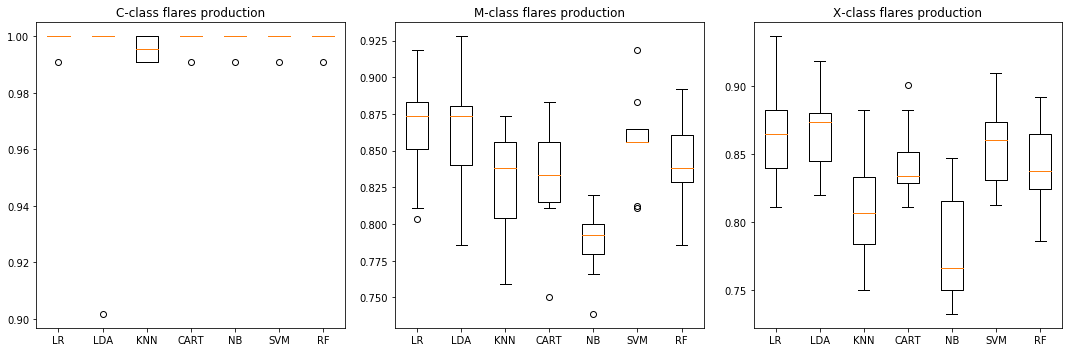

In [21]:
plt.rcParams["figure.figsize"] = 15, 5
fig = plt.figure()

for i in range(len(Y[0])):
    ax = fig.add_subplot('13' + str(i+1))
    plt.boxplot(results[i::len(Y[0])])
    ax.set_xticklabels(names)
    plt.title(index[i])

plt.tight_layout()

# Making predictions on validation dataset
For "M-class flares production".

In [22]:
algo = LogisticRegression()
algo.fit(X_train, Y_train[:,1])
predictions = algo.predict(X_validation)
print("Accurace score:", accuracy_score(Y_validation[:,1], predictions))
print("\nConfusion Matrix\n")
print(confusion_matrix(Y_validation[:,1], predictions))
print("\nPrecision/recall table\n")
print(classification_report(Y_validation[:,1], predictions))

Accurace score: 0.8489208633093526

Confusion Matrix

[[208  26]
 [ 16  28]]

Precision/recall table

             precision    recall  f1-score   support

          0       0.93      0.89      0.91       234
          1       0.52      0.64      0.57        44

avg / total       0.86      0.85      0.85       278

